In [1]:
from umi_surrogate import UmiSurrogate
from surrogate import Surrogate
from schema import Schema
import pandas as pd
import os

INFO:Surrogate:Using cuda for surrogate model.


In [2]:
template_path = "D:/Users/zoelh/GitRepos/ml-for-building-energy-modeling/ml-for-bem/data/template_libs/cz_libs/residential/CZ1A.json"
umi_path = "D:/Users/zoelh/GitRepos/ml-for-building-energy-modeling/umi/Sample/SampleBuildings.umi"

schema = Schema()
surrogate = Surrogate(schema=schema) #, runtype="umi"

INFO:Surrogate:Loading the full dataset into main RAM...
INFO:Surrogate:Finished loading the full dataset.
INFO:Surrogate:Full Input Batch Size (in storage form, not MLVec Form): 382.750176MB
INFO:Surrogate:Loading climate data...
INFO:Surrogate:Finished loading climate data.
INFO:Surrogate:Checking model dimensions...
INFO:Surrogate:63 building parameters per input vector
INFO:Surrogate:11 timeseries per input vector
INFO:Surrogate:4 timeseries per output vector
INFO:Surrogate:12 timesteps in output.
INFO:Surrogate:Initializing machine learning objects...
INFO:Surrogate:ML objects initialized.


In [3]:
umi = UmiSurrogate.open(umi_path=umi_path, schema=schema, surrogate=surrogate)

In [4]:
print(umi.epw)
umi.extract_climate_vector()
print(umi.climate_vector.shape)

EPW file Data for [Boston Logan IntL Arpt]
(7, 8760)


In [5]:
umi.extract_vectors_from_templates()
#TODO: why cant this be run twice?

INFO:UmiSurrogate:Collecting data from building templates...
INFO:UmiSurrogate:Fetching BuildingTemplate vector data from PROG_00_VINTAGE_00_MASS_0
INFO:UmiSurrogate:Fetching BuildingTemplate vector data from PROG_00_VINTAGE_00_MASS_1
INFO:UmiSurrogate:Fetching BuildingTemplate vector data from PROG_00_VINTAGE_01_MASS_0
INFO:UmiSurrogate:Fetching BuildingTemplate vector data from PROG_00_VINTAGE_01_MASS_1
INFO:UmiSurrogate:Fetching BuildingTemplate vector data from PROG_00_VINTAGE_02_MASS_0
INFO:UmiSurrogate:Fetching BuildingTemplate vector data from PROG_00_VINTAGE_02_MASS_1
INFO:UmiSurrogate:Fetching BuildingTemplate vector data from PROG_00_VINTAGE_03_MASS_0
INFO:UmiSurrogate:Fetching BuildingTemplate vector data from PROG_00_VINTAGE_03_MASS_1
INFO:UmiSurrogate:Fetching BuildingTemplate vector data from PROG_01_VINTAGE_00_MASS_0
INFO:UmiSurrogate:Fetching BuildingTemplate vector data from PROG_01_VINTAGE_00_MASS_1
INFO:UmiSurrogate:Fetching BuildingTemplate vector data from PROG_01_

In [6]:
print(umi.template_vectors.keys())

dict_keys(['PROG_00_VINTAGE_00_MASS_0', 'PROG_00_VINTAGE_00_MASS_1', 'PROG_00_VINTAGE_01_MASS_0', 'PROG_00_VINTAGE_01_MASS_1', 'PROG_00_VINTAGE_02_MASS_0', 'PROG_00_VINTAGE_02_MASS_1', 'PROG_00_VINTAGE_03_MASS_0', 'PROG_00_VINTAGE_03_MASS_1', 'PROG_01_VINTAGE_00_MASS_0', 'PROG_01_VINTAGE_00_MASS_1', 'PROG_01_VINTAGE_01_MASS_0', 'PROG_01_VINTAGE_01_MASS_1', 'PROG_01_VINTAGE_02_MASS_0', 'PROG_01_VINTAGE_02_MASS_1', 'PROG_01_VINTAGE_03_MASS_0', 'PROG_01_VINTAGE_03_MASS_1', 'PROG_02_VINTAGE_00_MASS_0', 'PROG_02_VINTAGE_00_MASS_1', 'PROG_02_VINTAGE_01_MASS_0', 'PROG_02_VINTAGE_01_MASS_1', 'PROG_02_VINTAGE_02_MASS_0', 'PROG_02_VINTAGE_02_MASS_1', 'PROG_02_VINTAGE_03_MASS_0', 'PROG_02_VINTAGE_03_MASS_1', 'PROG_03_VINTAGE_00_MASS_0', 'PROG_03_VINTAGE_00_MASS_1', 'PROG_03_VINTAGE_01_MASS_0', 'PROG_03_VINTAGE_01_MASS_1', 'PROG_03_VINTAGE_02_MASS_0', 'PROG_03_VINTAGE_02_MASS_1', 'PROG_03_VINTAGE_03_MASS_0', 'PROG_03_VINTAGE_03_MASS_1'])


In [7]:
new_p = "D:/Users/zoelh/GitRepos/ml-for-building-energy-modeling/umi/Sample/SampleBuildings/eplus"
umi.set_energy_path(new_p)

,ParentBuildingId,PerimeterAreaWeight,CoreAreaWeight,PerimeterArea,CoreArea,Orientation,ClusterId,Roof2FloorRatio,Ground2FloorRatio,Floor2Fac,Core2Perimeter,ShoeboxPath
0,45528662-89aa-7b48-8da3-1153c0ecbd22,258.010417,344.437341,1255.630962,1676.235380,West,Group0,0.250000,0.250000,0.820404,1.334975,D:\Users\zoelh\GitRepos\ml-for-building-energy...
1,45528662-89aa-7b48-8da3-1153c0ecbd22,23.925238,31.939584,1255.630962,1676.235380,West,Group0,0.250000,0.250000,0.820404,1.334975,D:\Users\zoelh\GitRepos\ml-for-building-energy...
2,45528662-89aa-7b48-8da3-1153c0ecbd22,319.021121,425.885078,1255.630962,1676.235380,North,Group0,0.250000,0.250000,0.820404,1.334975,D:\Users\zoelh\GitRepos\ml-for-building-energy...
3,45528662-89aa-7b48-8da3-1153c0ecbd22,27.396955,36.574237,1255.630962,1676.235380,North,Group0,0.250000,0.250000,0.820404,1.334975,D:\Users\zoelh\GitRepos\ml-for-building-energy...
4,45528662-89aa-7b48-8da3-1153c0ecbd22,344.588024,460.016242,1255.630962,1676.235380,South,Group0,0.250000,0.250000,0.820404,1.334975,D:\Users\zoelh\GitRepos\ml-for-building-energy...
...,...,...,...,...,...,...,...,...,...,...,...,...
359,732c8b01-207a-b746-b74c-c6ee5b2dade4,24.563465,82.393378,11825.777197,39667.276413,North,Group9,0.055556,0.055556,0.912629,3.354306,D:\Users\zoelh\GitRepos\ml-for-building-energy...
360,732c8b01-207a-b746-b74c-c6ee5b2dade4,4206.170093,14108.781940,11825.777197,39667.276413,West,Group9,0.055556,0.055556,0.912629,3.354306,D:\Users\zoelh\GitRepos\ml-for-building-energy...
361,732c8b01-207a-b746-b74c-c6ee5b2dade4,7.892969,26.475435,11825.777197,39667.276413,North,Group9,0.055556,0.055556,0.912629,3.354306,D:\Users\zoelh\GitRepos\ml-for-building-energy...
362,732c8b01-207a-b746-b74c-c6ee5b2dade4,66.750024,223.900012,11825.777197,39667.276413,North,Group9,0.055556,0.055556,0.912629,3.354306,D:\Users\zoelh\GitRepos\ml-for-building-energy...


In [ ]:
umi.fetch_raw_shoebox_results()

In [9]:
print(len(umi._raw_shoebox_results))
umi._raw_shoebox_results[0]['data']['CORE']

128


,heating_CORE,cooling_CORE,dhw_CORE,lights_CORE,equip_CORE,temp_CORE,solargain_CORE
2018-01-01 00:00:00,309396.281692,0.0,1.966072e+07,25422.571508,49646.346079,20.000000,0.0
2018-01-01 01:00:00,166172.246856,0.0,1.966072e+07,25422.571508,46035.702728,20.000000,0.0
2018-01-01 02:00:00,185876.855087,0.0,1.966072e+07,25422.571508,44230.381052,20.000000,0.0
2018-01-01 03:00:00,196396.847500,0.0,1.966072e+07,25422.571508,43327.720214,20.000000,0.0
2018-01-01 04:00:00,184288.498473,0.0,1.966072e+07,37609.680530,49872.011289,20.000000,0.0
...,...,...,...,...,...,...,...
2018-12-31 19:00:00,0.000000,0.0,1.711663e+07,119512.294925,136978.782136,20.076928,0.0
2018-12-31 20:00:00,0.000000,0.0,1.711663e+07,120953.780938,133368.138785,20.156921,0.0
2018-12-31 21:00:00,0.000000,0.0,1.966072e+07,89372.132828,117120.243705,20.238020,0.0
2018-12-31 22:00:00,0.000000,0.0,1.966072e+07,57790.484717,92071.405456,20.221118,0.0


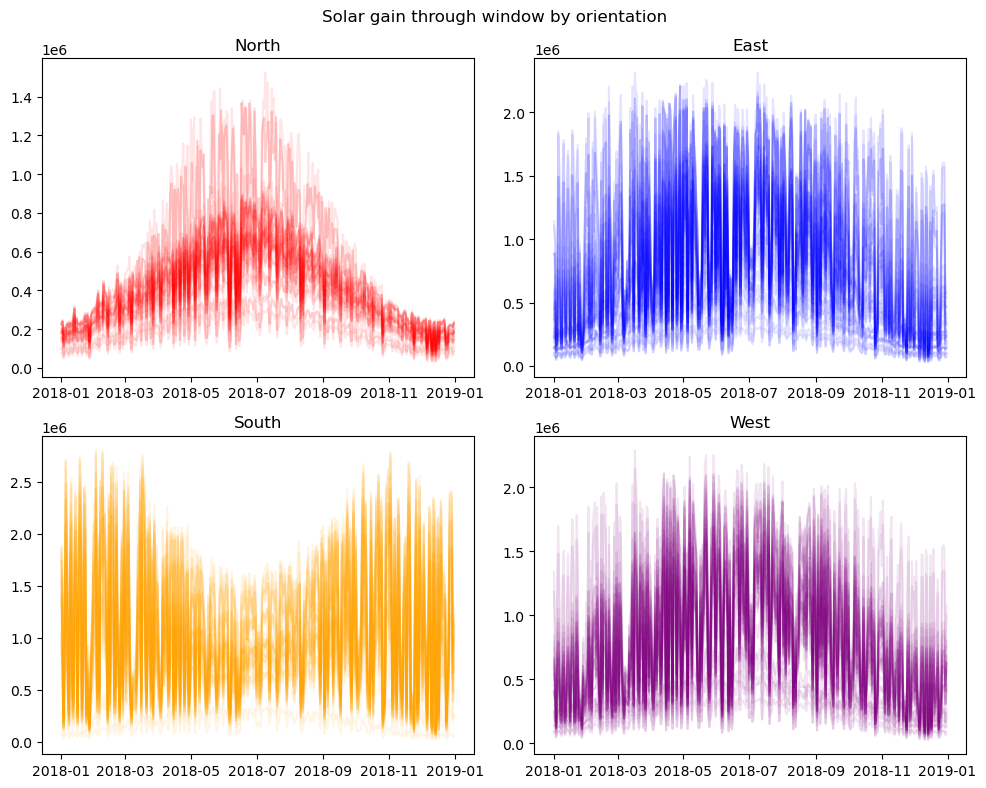

In [13]:
# Plot all of the radiation values

import matplotlib.pyplot as plt
from pandas import DatetimeIndex

def daily(eseries):
    if isinstance(eseries.index, DatetimeIndex):
        data = eseries.resample("D").mean()
        return eseries._constructor(
            data, index=data.index, frequency="M", units=eseries.units
        )
    else:
        return None

orient_lookup = {
    'North': 0,
    'East': 1,
    'South': 2,
    'West': 3
}
cols = ['red', 'blue', 'orange', 'purple']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()
for dic in umi._raw_shoebox_results:
    orient = umi.shoeboxdf[umi.shoeboxdf['ShoeboxPath']==dic['ShoeboxPath']]['Orientation'].to_list()[0]
    rad = daily(dic['data']['PERIM']['solargain_PERIM'])
    # rad = dic['data']['PERIM']['solargain_PERIM']
    axes[orient_lookup[orient]].plot(rad, cols[orient_lookup[orient]],alpha=0.1)
for i, ax in enumerate(axes):
    ax.set_title(list(orient_lookup.keys())[i])
fig.suptitle("Solar gain through window by orientation")
fig.tight_layout()
plt.show()

All the peices are in place for a surrogate run.